In [12]:
import numpy as np
import emcee
from matplotlib import pyplot as plt

In [9]:
def log_prob(x, ivar):
    return -0.5 * np.sum(ivar * x**2)

ndim, nwalkers = 5,16
ivar = 1./np.random.rand(ndim)

p0 = np.random.randn(nwalkers, ndim)

sampler = emcee.EnsembleSampler(
    nwalkers,
    ndim,
    log_prob,
    args=[ivar]
)

In [10]:
sampler.run_mcmc(p0,100000,progress=True)

100%|██████████| 100000/100000 [00:16<00:00, 6130.80it/s]


State([[-0.49846232 -0.17194709 -0.47763105  0.46165691  0.01416717]
 [ 0.84622479 -0.61781948  0.8972763   0.42466816 -0.81820239]
 [-0.10394486 -0.35788587 -0.51271467 -0.14805743  1.04615402]
 [-1.41451848  0.2055316   0.27240012  0.89719188  0.78181418]
 [ 0.94754469  0.51921228 -0.02562716 -0.09971059 -1.51558281]
 [-1.891199   -0.41783688 -0.93879773  0.00240478 -0.27596055]
 [-0.24560805  1.28643941  0.50561422  0.2544763   0.56933669]
 [ 1.48766618 -0.03213583  0.19626088 -0.37822585 -0.09269076]
 [-1.67211627 -0.35830755 -1.03219167  1.23992823 -0.18397929]
 [ 0.41488059 -0.05152165 -0.17357088 -0.26033547 -0.05262951]
 [-0.01112314 -0.24003975  0.16824449 -0.0084961   0.18039942]
 [ 0.57446758 -0.16477819 -0.65596137  0.07949693  0.05416172]
 [-0.36876952 -0.64955946 -0.90744955  0.65366766  0.00509835]
 [ 0.32530028 -0.70237313  0.34455687 -0.75460512  0.72599089]
 [-0.29463161 -0.66074578  1.07473615  0.04278208  0.13070914]
 [ 0.24869747 -0.7947304  -1.40441899 -0.5111786 

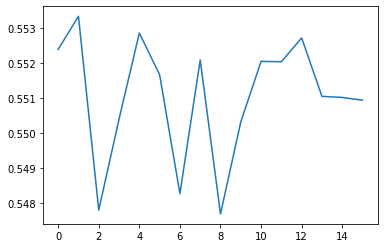

In [13]:
plt.plot(sampler.acceptance_fraction)

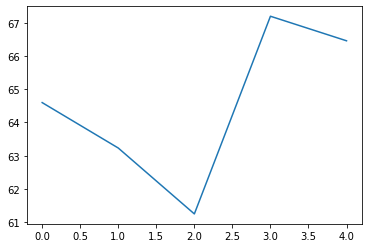

In [14]:
plt.plot(sampler.get_autocorr_time())

In [15]:
np.mean(sampler.get_autocorr_time())

64.54703432325718

In [17]:
flat_samples = sampler.get_chain(
    discard=200,
    flat=True
)

In [20]:
import corner

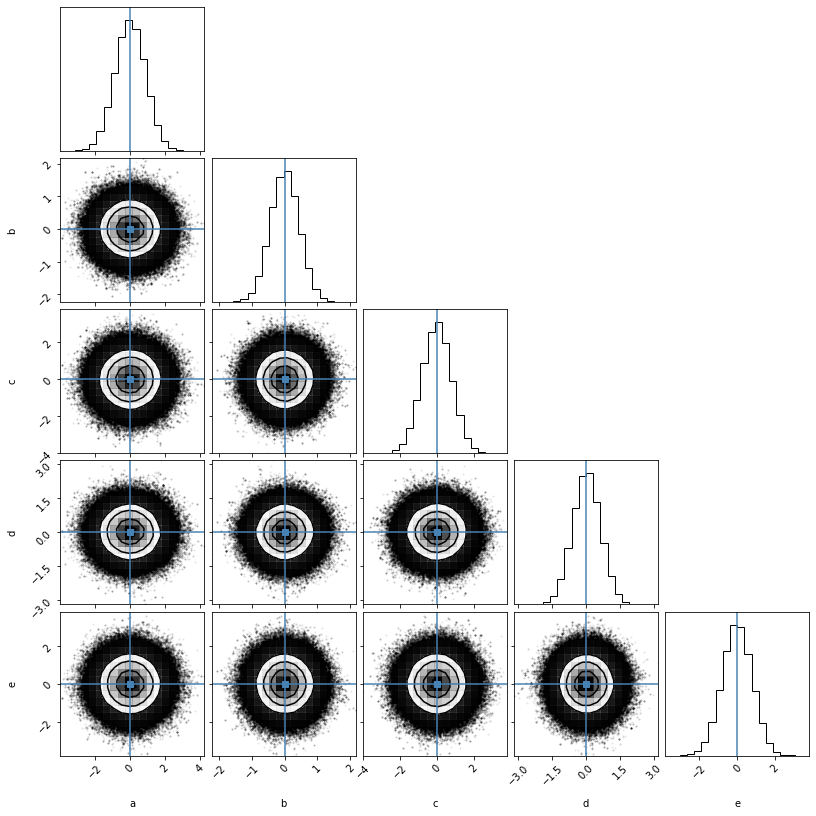

In [21]:
fig = corner.corner(
    flat_samples, 
    labels='abcde',
    truths=[0,0,0,0,0]
)